## Import libraries that we needed

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [3]:
df = pd.read_csv('fifa21 raw data v2.csv')

C:\Users\Attic\AppData\Local\Temp\ipykernel_39032\235989469.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21 raw data v2.csv')


# Data Exploration

In [4]:
#check the shape of the dataframe
df.shape

(18979, 77)

In [5]:
#check what columns are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

# Data Cleaning


### 1. Remove columns we do not need

In [6]:
#Remove columns contains url links
url_columns = ['photoUrl','playerUrl']

df = df.drop(columns = url_columns)

In [7]:
#Replace Name with LongName

df = df.drop(columns = 'Name')
df = df.rename(columns = {'LongName' : 'Name'})

### 2. As we can see, it contains '\n\n\n\' in the Club columns, therefore we have to removie it

In [8]:
# Replace \n\n\n\n' wit blanks
df['Club'].replace('\n\n\n\n', '' , regex = True, inplace = True )

C:\Users\Attic\AppData\Local\Temp\ipykernel_39032\2482407156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Club'].replace('\n\n\n\n', '' , regex = True, inplace = True )


### 3. In the Height column, we can see there is inconsistency on the unit, therefore we have to
1. Convert to cm
2. Convert to numbers

In [9]:
#Check the values of 'Heights'
df['Height'].unique()


array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [10]:
df = df.replace('cm','', regex = True)

In [11]:
def inch_to_cm(value):
    if '"' in value:
        value = value.replace('"', '')
        value = value.replace("\'", "")
        value = round(float(value[0])*30.48) + round(float(value[1]) * 2.54)
    return value

In [12]:
df['Height'].apply(inch_to_cm)


0        170
1        187
2        188
3        181
4        175
        ... 
18974    178
18975    175
18976    179
18977    175
18978    188
Name: Height, Length: 18979, dtype: object

### 4. Weight column has the same problem, so we need to convert to number 

In [13]:
# Convert Weight to numerical value in kg
def convert_weight_col(value):
    if "kg" in value:
         value = value.strip('kg')
    else:
         value = value.strip('lbs')
         value = round(int(value)* 0.45359237)
    return value

In [14]:
# Convert each values in the column using function
df['Weight'] = df['Weight'].map(convert_weight_col)
# Convert dtype from string to int
df['Weight'] = df['Weight'].astype(int)

### 5. Convert Value, Wage, Release Clause to numbers since they are string

In [18]:
def convert_money(value):
    if "K" in value:
        value = value.strip("K")
        value = value.strip("€")
        value = round(float(value)* 1000)
        
    elif "M"  in value:
        value = value.strip("M")
        value = value.strip("€")
        value = round(float(value)* 1000000) 
    
        
    else:
        value = value.strip("€")
        value = round(float(value))
        
    return value

In [19]:
#Convert all to numbers
df['Value'] = df['Value'].map(convert_money)
df['Wage'] = df['Wage'].map(convert_money)
df['Release Clause'] = df['Release Clause'].map(convert_money)



### 6. Seperate Joined column into Day, Month, and Year

In [20]:
df.Joined

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [21]:
# Create new columns for Joined Day, Month, and Year
df['Joined_Year'] = pd.DatetimeIndex(df['Joined']).year
df['Joined_Month'] = pd.DatetimeIndex(df['Joined']).month
df['Joined_Day'] = pd.DatetimeIndex(df['Joined']).day

### 7. Convert 'Hits' column into numbers

In [22]:
df['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [23]:
df['Hits'] = df['Hits'].replace('K','00', regex= True)
df['Hits'] = df['Hits'].str.replace(r'.0','')
df['Hits'] = df['Hits'].str.replace(r'.','')
df['Hits'] = df['Hits'].fillna(0)
df['Hits'] = df['Hits'].astype(int)


### 8. Column 'IR' have 'star' characters. Strip the stars and make the columns numerical

In [24]:
df.IR.unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [25]:
#Remove star by spliting the string and returning the first character 
df['IR'] = df['IR'].apply(lambda x : str(x).split()[0])
df['IR'] = df['IR'].astype(int)

# Data Visualisation

In [461]:
#the players played in the same club for 10 years or more
above_10 = df[df['Joined_Year']< 2011 ]
above_10.head() 

,ID,Name,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_Year,Joined_Month,Joined_Day
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,...,85,92,91,95,38,65,771,2004,7,1
15,165153,Karim Benzema,France,32,89,89,Real Madrid,2009 ~ 2022,"CF, ST",185,...,74,85,81,86,40,76,216,2009,7,9
16,155862,Sergio Ramos García,Spain,34,89,89,Real Madrid,2005 ~ 2021,CB,184,...,71,70,76,73,88,85,212,2005,8,1
23,202126,Harry Kane,England,26,88,89,Tottenham Hotspur,2010 ~ 2024,ST,188,...,68,91,80,80,47,83,332,2010,7,1
39,138956,Giorgio Chiellini,Italy,35,87,87,Juventus,2005 ~ 2021,CB,187,...,66,46,58,60,90,79,130,2005,7,1


#### Top 10 most valuable players

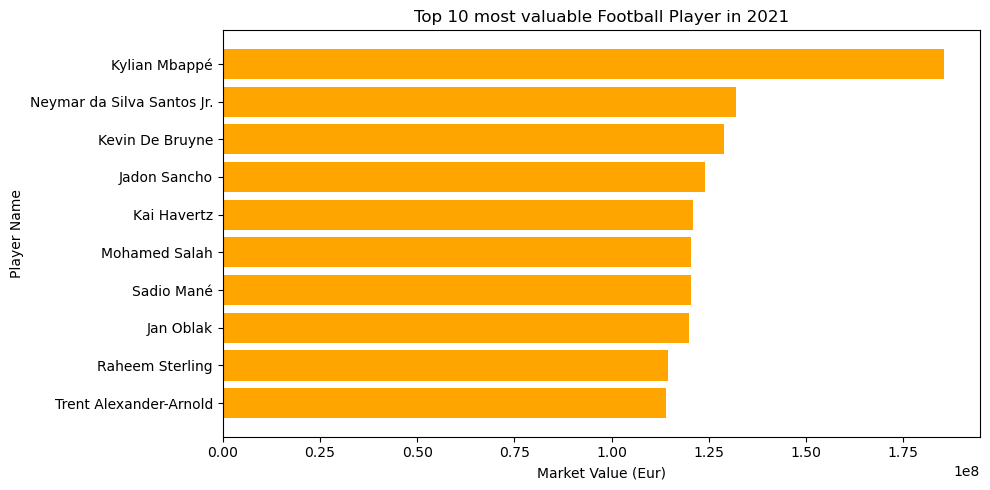

In [450]:
#Select columns
players = df[['Name', 'Value']]

players = players.sort_values(by ='Value', ascending= False)

top_10_players = players.head(10)

#Convert players name to list
player_names = top_10_players['Name'].to_list()

#Convert players value to list
player_value = top_10_players['Value'].to_list()

#Create figure
plt.figure(figsize = (10,5))

#Create bar chart
plt.barh(player_names, player_value, color = 'orange')

#Add label
plt.xlabel("Market Value (Eur)")
plt.ylabel("Player Name")
plt.title("Top 10 most valuable Football Player in 2021")

# Invert y-axis for readability and adjust layout
plt.gca().invert_yaxis()  # Invert y-axis to display highest value at the top
plt.tight_layout()

# Display the plot
plt.show()

#### Find out the age and performance relationship

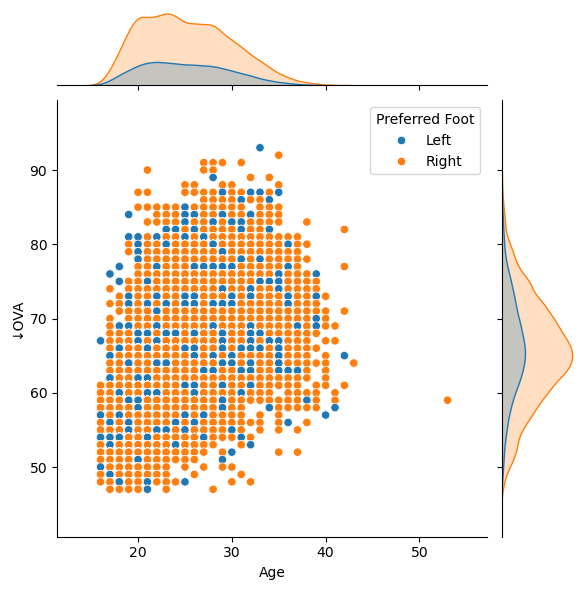

In [451]:
#Find out the age and performance relationship
sns.jointplot(data=df, x="Age", y="↓OVA", hue='Preferred Foot')

In [453]:
#Locate the outlier
df.loc[df['Age'] > 50, ['Name', 'Nationality', 'Club']]


,Name,Nationality,Club
16109,Kazuyoshi Miura,Japan,Yokohama FC


#### Find out the relationship between Wage and performance

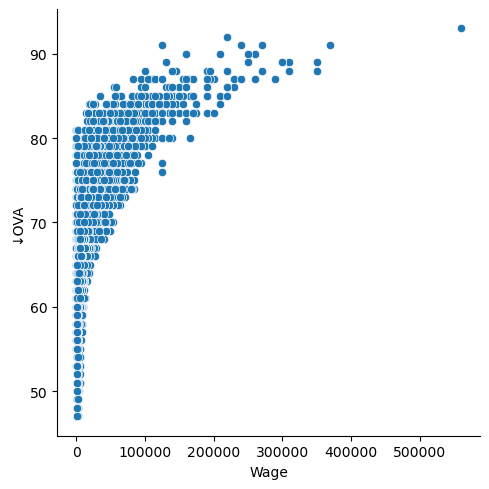

In [500]:
#Correlation plot between Performance and Wage
sns.relplot(data=df, x="Wage", y="↓OVA")

It shows player with better performance earned higher wages, with one outstanding player earning far more than others

In [457]:
#Find out the player with outstanding wages
df.loc[df['Wage'] > 500000 , ['Name', 'Nationality', 'Club']]

,Name,Nationality,Club
0,Lionel Messi,Argentina,FC Barcelona


It turns out it is the GOAT - Lionel Messi !!

In [46]:
#the top 10 highest paid players
highest_payed = df.nlargest(n=10, columns=['Wage'], keep='all')
highest_payed[["Wage",'Name', 'Nationality', 'Club','↓OVA']]


,Wage,Name,Nationality,Club,↓OVA
0,560000,Lionel Messi,Argentina,FC Barcelona,93
3,370000,Kevin De Bruyne,Belgium,Manchester City,91
15,350000,Karim Benzema,France,Real Madrid,89
26,350000,Eden Hazard,Belgium,Real Madrid,88
12,310000,Carlos Henrique Venancio Casimiro,Brazil,Real Madrid,89
27,310000,Toni Kroos,Germany,Real Madrid,88
16,300000,Sergio Ramos García,Spain,Real Madrid,89
17,300000,Sergio Agüero,Argentina,Manchester City,89
28,290000,Antoine Griezmann,France,FC Barcelona,87
4,270000,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91


Text(0.5, 1.0, 'Top 10 (11) Highest paid players in FIFA 21')

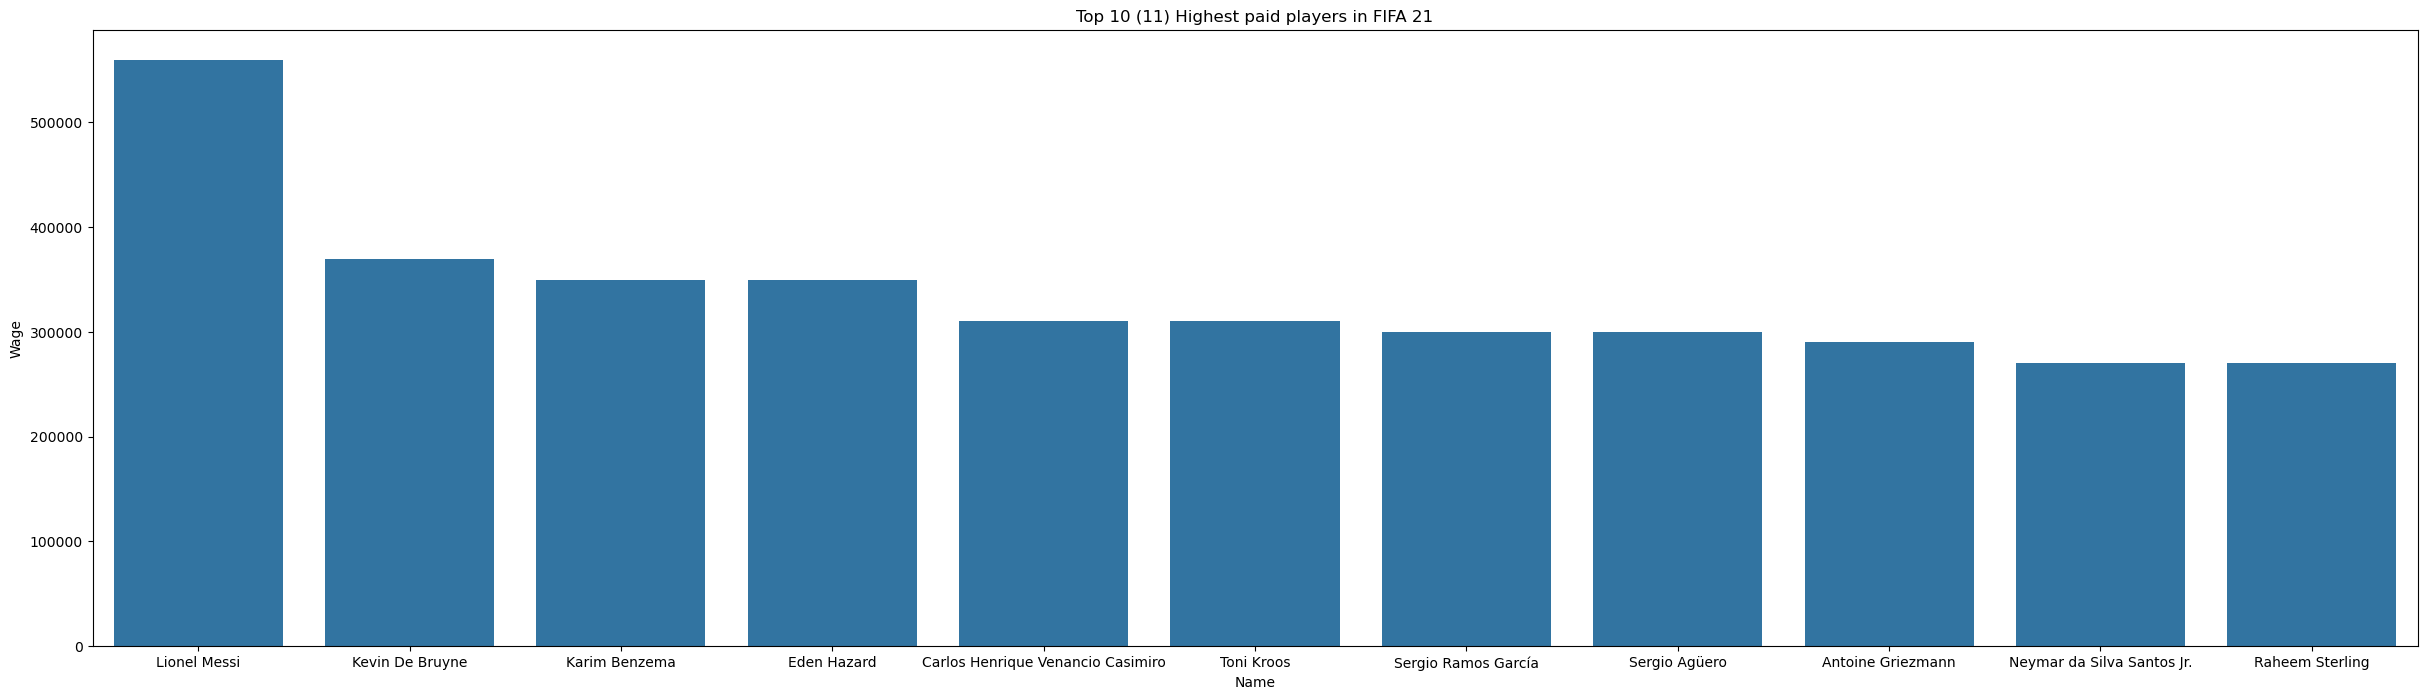

In [49]:
plt.figure(figsize=(30,8))
sns.barplot(highest_payed, x = 'Name',y = 'Wage').set_title("Top 10 (11) Highest paid players in FIFA 21")


#### What about Value vs Performance

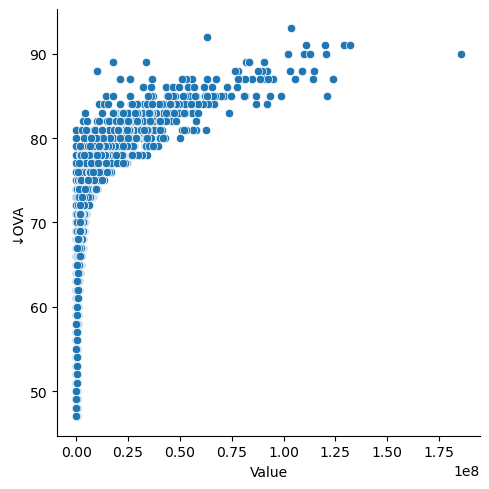

In [54]:
sns.relplot(data=df, x="Value", y="↓OVA")

In [540]:
#Highest value players in 90+ rating
df.loc[(df['Value'] > 1*100000000) & (df['↓OVA'] > 90) , ['Name', 'Nationality', 'Club','↓OVA', 'Value', 'Best Position']].sort_values('Value', ascending= False)


,Name,Nationality,Club,↓OVA,Value,Best Position
4,Neymar da Silva Santos Jr.,Brazil,Paris Saint-Germain,91,132000000,LW
3,Kevin De Bruyne,Belgium,Manchester City,91,129000000,CAM
2,Jan Oblak,Slovenia,Atlético Madrid,91,120000000,GK
5,Robert Lewandowski,Poland,FC Bayern München,91,111000000,ST
0,Lionel Messi,Argentina,FC Barcelona,93,103500000,RW


In [536]:
#Lowest value player in near 90 rating
df.loc[(df['Value'] < 0.25*100000000) & (df['↓OVA'] > 86) ,  ['Name', 'Nationality', 'Club', '↓OVA', 'Value','Best Position']].sort_values('Value', ascending= False)

,Name,Nationality,Club,↓OVA,Value,Best Position
39,Giorgio Chiellini,Italy,Juventus,87,21000000,CB
14,Manuel Neuer,Germany,FC Bayern München,89,17500000,GK
24,Samir Handanovič,Slovenia,Inter,88,10000000,GK


It shows that there a huge gap of value across players who has Overall rating close to 90, from 175M to 10M.

It shows that position has a huge impact of the Value of players, most players with attacking possitions has higher values. Only Jan Oblak has similar Value as a GK.

#### Wage vs Value

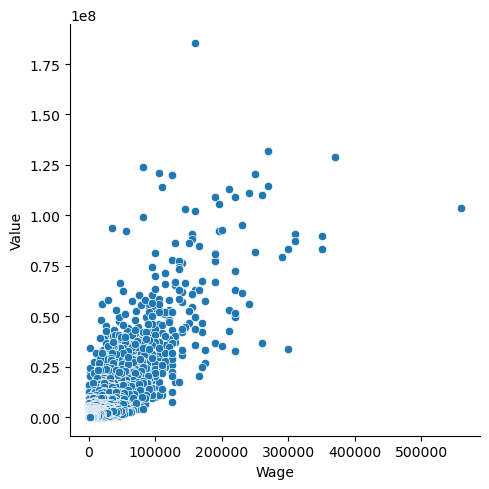

In [463]:
sns.relplot(data = df, x = 'Wage', y = 'Value')

It shows that there is positive correlation between Wage and Value, but somes are 'Under paid' or 'Over paid'

Lets find out who gets overpaid and underpaid.

In [496]:
#Example 1 (Over paid)
df.loc[(df['Wage'] > 500000) &  (df['Value'] > 1*100000000) , ['Name', 'Nationality', 'Club']]

,Name,Nationality,Club
8,Kylian Mbappé,France,Paris Saint-Germain


In [541]:
#Example 2 (Under Paid)
df.loc[(df['Wage'] > 100000) & (df['Wage'] < 200000) & (df['Value'] > 1.75*100000000) , ['Name', 'Nationality', 'Club']]

,Name,Nationality,Club
8,Kylian Mbappé,France,Paris Saint-Germain


It shows that Leoniel Messi is the 'Overpaid' player and 'Kylian Mbappe' is the 'underpaid' player
the Value and Wage could be influrenced by Age, contract length and any other factors.

And the wage of Mbappe might because of the wage structure within the team, and him still being young.

In [497]:
# One more example of underpaid player
df.loc[(df['Wage'] < 100000) &  (df['Value'] > 1*100000000) , ['Name', 'Nationality', 'Club']]
# Consider his age and achievement, it seems a over-value player more than a 'underpaid' player.

,Name,Nationality,Club
29,Jadon Sancho,England,Borussia Dortmund


####  Overall rating vs Potential

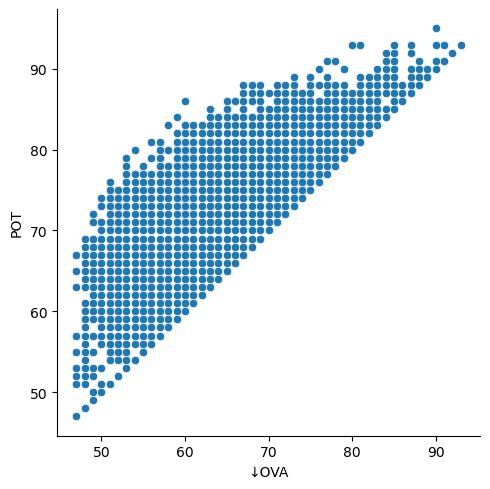

In [503]:
sns.relplot(data = df, x = '↓OVA', y = 'POT')

It shows a strong positive correlation between Overall Rating and Potential for FIFA 2021 players. This could be useful for predicting the future star and evaluating value of players.